In [7]:
import pandas as pd

# Read the Excel file
dataxl = pd.read_excel('data.xlsx')

# Convert DataFrame to CSV format
dataxl.to_csv('data.csv', index=False)


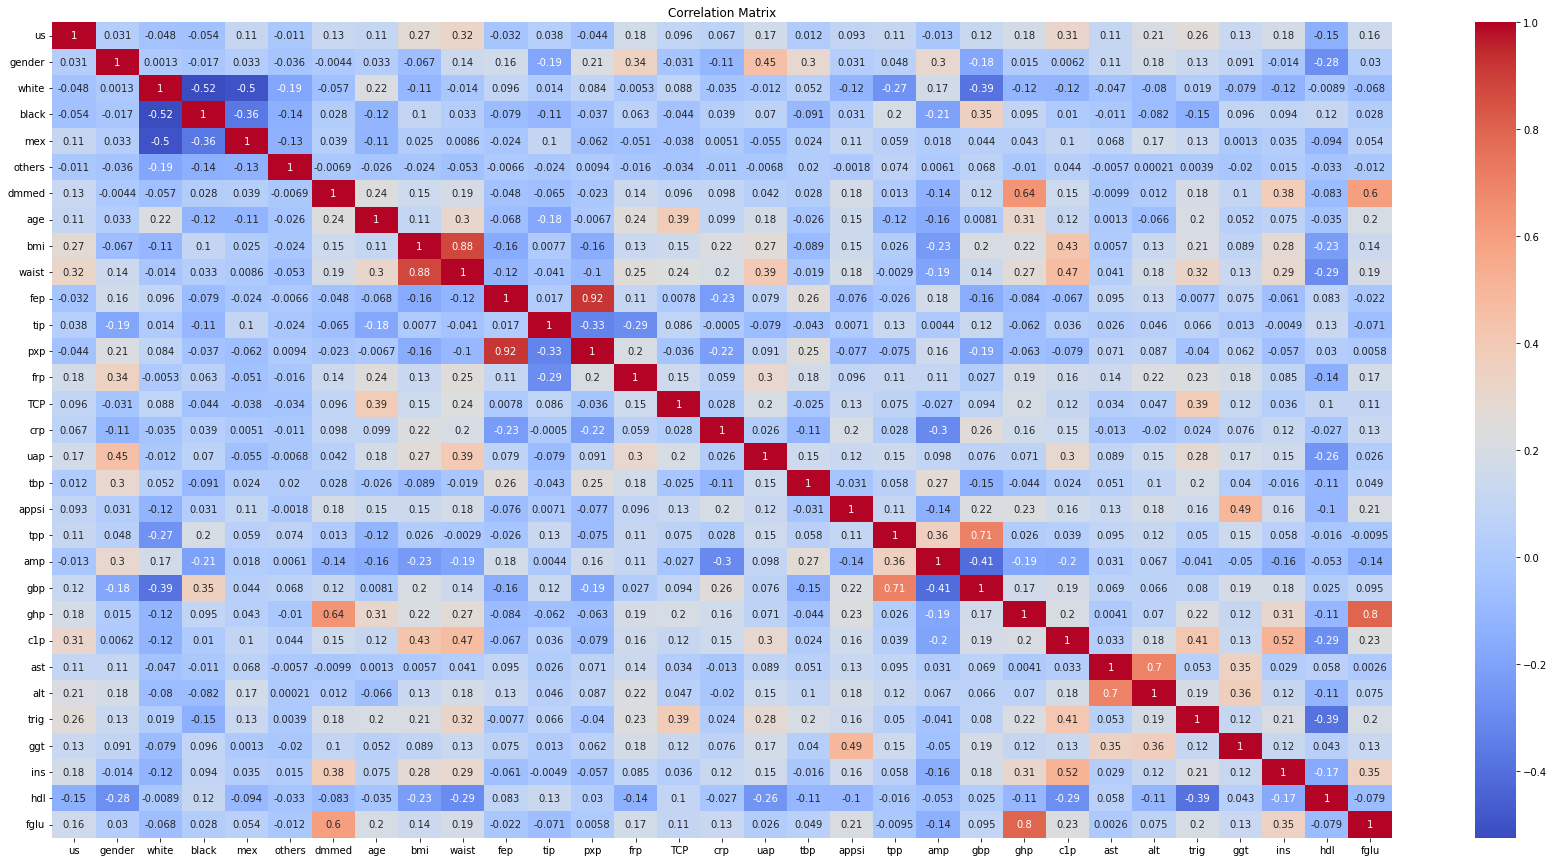

In [8]:
# Step 3: Feature selection (using correlation analysis)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('data.csv')
# Calculate the correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify the features highly correlated with the target
target_corr_threshold = 0.2  # Adjust the threshold as needed
target_correlation = corr_matrix['us']
selected_features = target_correlation[abs(target_correlation) > target_corr_threshold].index.tolist()

# Step 4: Continue with the neural network architecture design and follow the subsequent steps accordingly


In [9]:
print(selected_features)

['us', 'bmi', 'waist', 'c1p', 'alt', 'trig']


In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target variable (y)
X = data.drop('us', axis=1)
y = data['us']

# Train a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importance scores
importance_scores = rf.feature_importances_

# Create a dataframe of feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features
print(feature_importance_df)


   Feature  Importance
8    waist    0.079753
22     c1p    0.074791
27     ins    0.066529
25    trig    0.055291
7      bmi    0.054570
26     ggt    0.044684
24     alt    0.043359
12     frp    0.042836
29    fglu    0.041917
13     TCP    0.037452
6      age    0.037340
28     hdl    0.037219
10     tip    0.037134
21     ghp    0.035154
15     uap    0.034294
17   appsi    0.034007
23     ast    0.033892
9      fep    0.033563
11     pxp    0.032396
18     tpp    0.027315
20     gbp    0.025518
19     amp    0.024942
14     crp    0.019724
16     tbp    0.018250
2    black    0.007349
3      mex    0.006681
1    white    0.004741
0   gender    0.004248
5    dmmed    0.003089
4   others    0.001964


In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Separate features (X) and target variable (y)
X = data.drop('us', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Set the number of components you want to keep
X_pca = pca.fit_transform(X_scaled)

# Get the feature importance based on the absolute value of the PCA components
feature_importance = pd.Series(abs(pca.components_[0]), index=X.columns)

# Sort the features by importance in descending order
sorted_features = feature_importance.sort_values(ascending=False)

# Print the important features
print("Important Features based on PCA:")
print(sorted_features)


Important Features based on PCA:
waist     0.332288
ghp       0.295453
bmi       0.292544
c1p       0.292468
fglu      0.261598
ins       0.259576
trig      0.245834
dmmed     0.244267
appsi     0.211125
uap       0.200958
gbp       0.192784
frp       0.177899
age       0.172806
ggt       0.170720
hdl       0.159083
TCP       0.156608
crp       0.150818
alt       0.147117
amp       0.142123
white     0.103613
tpp       0.087146
fep       0.083482
ast       0.079989
pxp       0.073465
black     0.064137
gender    0.058995
mex       0.052357
tip       0.024883
others    0.002281
tbp       0.001723
dtype: float64


Epoch 1/50
57/57 [==============================] - 2s 7ms/step - loss: 0.5631 - accuracy: 0.7461 - val_loss: 0.5188 - val_accuracy: 0.7528
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.7461 - val_loss: 0.5075 - val_accuracy: 0.7528
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.7461 - val_loss: 0.5069 - val_accuracy: 0.7528
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4983 - accuracy: 0.7461 - val_loss: 0.5088 - val_accuracy: 0.7528
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.7461 - val_loss: 0.5036 - val_accuracy: 0.7638
Epoch 6/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4921 - accuracy: 0.7726 - val_loss: 0.5083 - val_accuracy: 0.7660
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4913 - accuracy: 0.7743 - val_loss: 0.5013 - val_accuracy: 0.7638
Epoch 8/50
57/57 [==

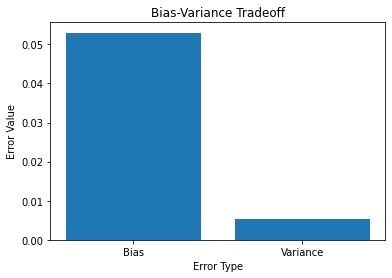

Average Precision: 0.749518464461125
Average Recall: 0.6362980143717849
Average F1-score: 0.682146505366402
Average AUC-ROC: 0.7836257213117992
average val accuracy 0.8543046355247498
average train accuracy 0.9470198750495911


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('data.csv')

# Preprocess the data (e.g., handle missing values, normalize/scale features)

# Split the dataset into training and validation sets
df = pd.read_csv('train.csv')
train_data1 = df.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
train_labels = df.iloc[:, [0]]
dftest = pd.read_csv('test.csv')
val_data1 = dftest.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
val_labels = dftest.iloc[:, [0]]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_data1)

# Scale the training data
train_data = scaler.transform(train_data1)
train_l = train_labels.to_numpy()
# Scale the validation data
val_data = scaler.transform(val_data1)
val_l = val_labels.to_numpy()
# Reshape the data for CNN input
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)
val_data = val_data.reshape(val_data.shape[0], val_data.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define the number of folds for cross-validation
num_folds = 5

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

train_scores = []
val_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []

for train_index, val_index in kf.split(train_data):
    # Split the data into training and validation sets for the current fold
    train_fold_data, val_fold_data = train_data[train_index], train_data[val_index]
    train_fold_labels, val_fold_labels = train_l[train_index], train_l[val_index]

    # Train the model on the current fold
    history = model.fit(train_fold_data, train_fold_labels, epochs=50, batch_size=32, validation_data=(val_fold_data, val_fold_labels))

    # Evaluate the model on the training and validation sets of the current fold
    train_predictions = model.predict(train_fold_data)
    val_predictions = model.predict(val_fold_data)

    # Calculate accuracy scores for training and validation sets
    train_acc = model.evaluate(train_fold_data, train_fold_labels, verbose=0)[1]
    val_acc = model.evaluate(val_fold_data, val_fold_labels, verbose=0)[1]

    train_scores.append(train_acc)
    val_scores.append(val_acc)
    val_predictions = model.predict(val_fold_data)
    val_predictions = np.round(val_predictions) 
    precision = precision_score(val_fold_labels, val_predictions)
    recall = recall_score(val_fold_labels, val_predictions)
    f1 = f1_score(val_fold_labels, val_predictions)
    auc_roc = roc_auc_score(val_fold_labels, val_predictions)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_roc_scores.append(auc_roc)

# Calculate bias and variance
bias = 1 - np.mean(train_scores)
variance = np.var(val_scores, ddof=1)
# Plot bias and variance
plt.bar(['Bias', 'Variance'], [bias, variance])
plt.xlabel('Error Type')
plt.ylabel('Error Value')
plt.title('Bias-Variance Tradeoff')
plt.show()
# Compute the average scores across all folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc_roc = np.mean(auc_roc_scores)
avg_val_acc=np.mean(val_scores)
avg_train_acc=np.mean(train_scores)
print('Average Precision:', avg_precision)
print('Average Recall:', avg_recall)
print('Average F1-score:', avg_f1)
print('Average AUC-ROC:', avg_auc_roc)
print('average val accuracy',avg_val_acc)
print('average train accuracy',avg_train_acc)

31/31 [==============================] - 0s 2ms/step


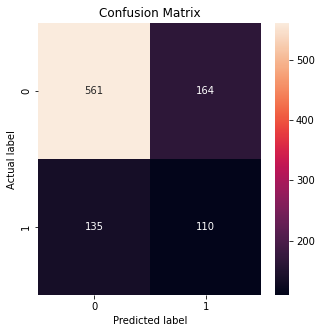

In [13]:
#  print confusion matrix of the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the predictions on the test set
test_predictions = model.predict(val_data)
val_predictions = np.round(test_predictions)  # Convert probabilities to binary predictions
#val_predictions = val_predictions.astype(int)
# Get the confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

 1/71 [..............................] - ETA: 1s

71/71 [==============================] - 0s 2ms/step


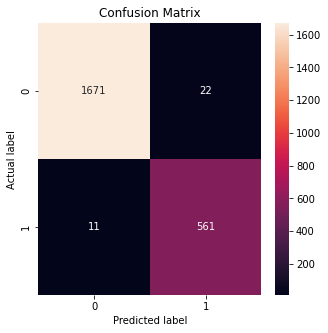

In [14]:
#  print confusion matrix of the train set
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the predictions on the train set
test_predictions = model.predict(train_data)
val_predictions = np.round(test_predictions)  # Convert probabilities to binary predictions
val_predictions = val_predictions.astype(int)
# Get the confusion matrix
cm = confusion_matrix(train_l, val_predictions)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
# waist     8
# ghp    21   
# bmi    7   
# c1p 22      
# fglu   29   
# ins   27
# trig   25
# alt   24

In [16]:
from keras.models import load_model
model.save('model.h5')

c:\Users\devik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model_final = load_model('model.h5')

model_final.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 6, 32)             128       
                                                                 
 conv1d_7 (Conv1D)           (None, 4, 32)             3104      
                                                                 
 conv1d_8 (Conv1D)           (None, 2, 32)             3104      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 1, 32)             0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                      

31/31 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.48      0.06      0.11       725
           1       0.22      0.80      0.35       245

    accuracy                           0.25       970
   macro avg       0.35      0.43      0.23       970
weighted avg       0.42      0.25      0.17       970

31/31 [==============================] - 0s 960us/step


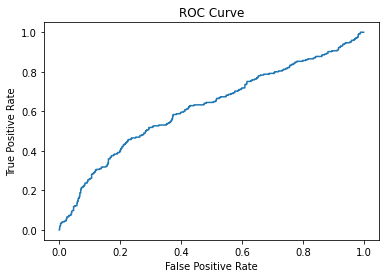

In [18]:

#  print classification report of the test set
from sklearn.metrics import classification_report

# Get the predictions on the test set

test_predictions = model.predict(val_data1)
test_predictions = np.round(test_predictions)  # Convert probabilities to binary predictions

# Print the classification report
print(classification_report(val_labels, test_predictions))

#  print ROC curve of the test set
from sklearn.metrics import roc_curve

# Get the predictions on the test set
test_predictions = model.predict(val_data)

# Get the false positive rate, true positive rate and threshold
fpr, tpr, thresholds = roc_curve(val_labels, test_predictions)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()